In [2]:
#-----------------------------------------------------------------------------
#   INSTALAMOS LIBRERÍAS
#-----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------
#   CARGAMOS LOS DATOS
#-----------------------------------------------------------------------------
df = pd.read_csv( "comprar_alquilar.csv" )
df


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


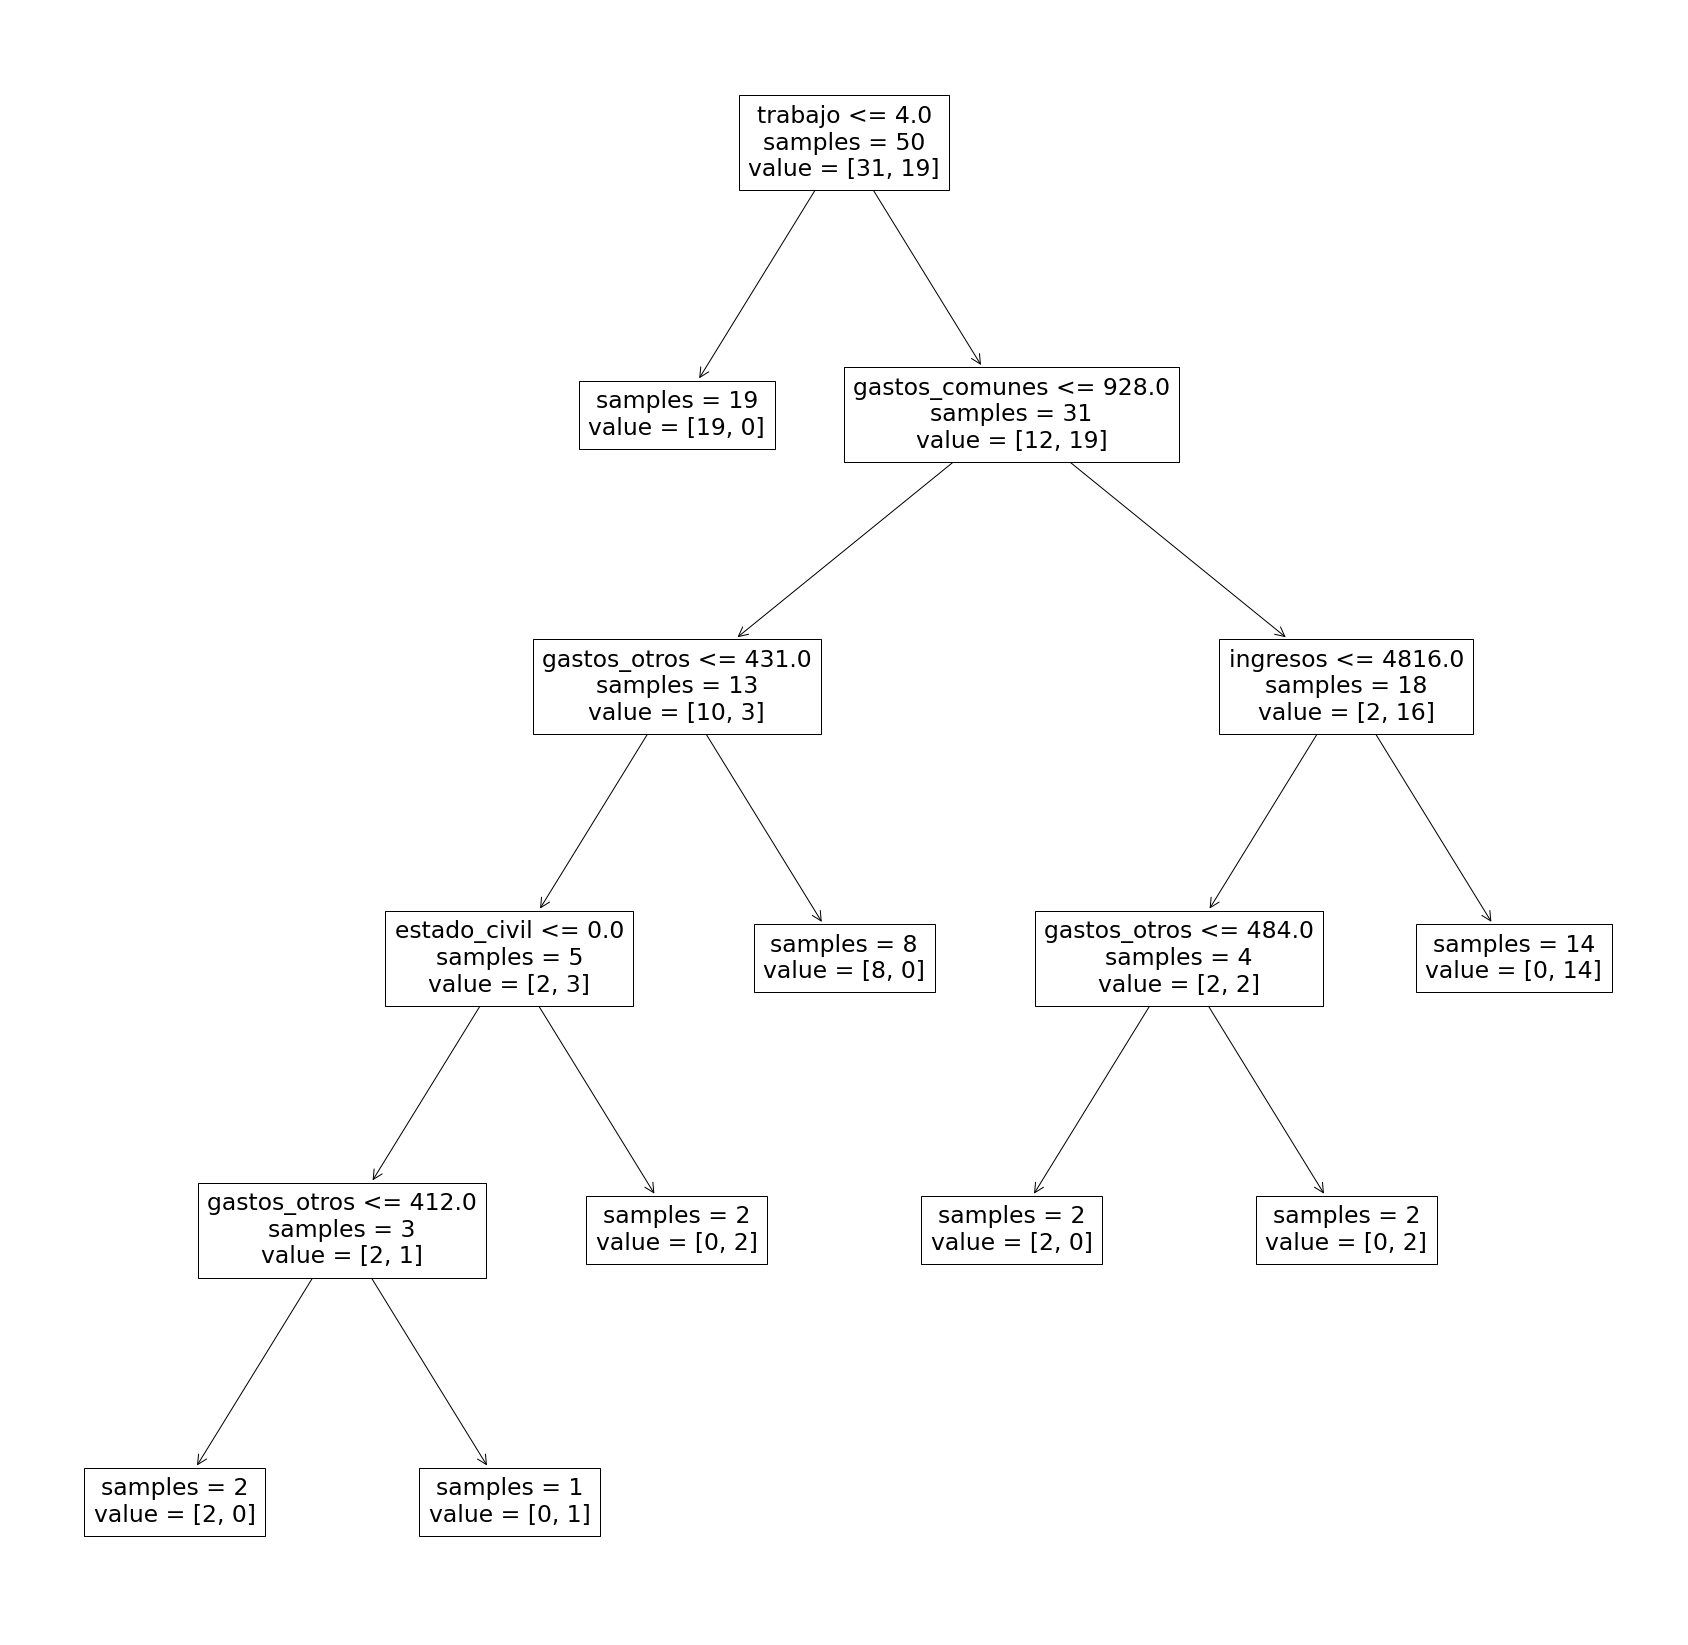

In [3]:
#-----------------------------------------------------------------------------
#   DATOS DE ENTRENAMIENTO Y PRUEBA
#-----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------
datos = [ "ingresos", "gastos_comunes", "pago_coche", "gastos_otros", "ahorros", "estado_civil", "hijos", "trabajo" ]
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    df[  datos  ],
    df[ "comprar" ],
    test_size = 0.75              # 20
    )

#-----------------------------------------------------------------------------
#   CREACIÓN DEL ÁRBOL DE DECISIÓN
#-----------------------------------------------------------------------------
from sklearn import tree
#-----------------------------------------------------------------------------
arbol_decision = tree.DecisionTreeClassifier(
    criterion = "entropy",     # gini, entropy, log_loss
    splitter = "best",      # best, random
    max_depth = 8
    )

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

plt.figure( figsize = ( 30, 30 ) )
tree.plot_tree( arbol, 
               max_depth = 8,
               feature_names = datos,
               filled = False,
               impurity = False,
               precision = 0
               )
plt.show()
